In [3]:
import pandas as pd
import numpy as np
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from matplotlib.ticker import MaxNLocator
import seaborn as sns
pio.renderers.default = "browser"


# Preprocessing Part

In [4]:
df1=pd.read_csv(r"sales_data_part1.csv")
df2=pd.read_csv(r"sales_data_part2.csv")
df3=pd.read_csv(r"customers.csv")

In [5]:
#concat the two dataframes
df=pd.concat([df1,df2],ignore_index=True)

In [6]:
#cleaning column names and sales_person names
df.columns=df.columns.str.lower().str.replace(' ','_')
df['sales_person']=df['sales_person'].str.lower()

In [7]:
# Fill missing values in string columns with 'unknown'
string_cols = df.select_dtypes(include=['object']).columns
df[string_cols] = df[string_cols].fillna('unknown')

In [8]:
# Replace zero values in 'units_sold' with one
df.loc[df['units_sold'] == 0, 'units_sold'] = 1

In [9]:
# Check for missing values in numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
missing_numeric = df[numeric_cols].isna().sum()
missing_numeric

,0
units_sold,0
unit_price,0
promotion_flag,0
commission_percent,0


In [10]:
# check for negative values
negative_numeric = df[df[numeric_cols]<0].sum()
negative_numeric

,0
order_id,0
date,0
customer_id,0
country_code,0
channel,0
sales_person,0
units_sold,0.0
unit_price,0.0
product_code,0
product,0


In [11]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [12]:
# Extract year, month, and weekday name from 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['weekday_name'] = df['date'].dt.day_name()


In [13]:
# Check unique values in 'country_code' column
df['country_code'].unique()

array(['JO', 'Jordan', 'Jordn', 'Jor', 'LEB', 'LEBN', 'LEBANON'],
      dtype=object)

In [14]:
df["country_code"] = df["country_code"].replace({"JO":"Jordan","Jor":"Jordan","Jordn":"Jordan","LEB":"Lebanon","LEBN":"Lebanon","LEBANON":"Lebanon"})

In [15]:
df["channel"].value_counts()

,count
channel,
Online,3279
Website,3247
Offline,880
offline,879
in-store,872
unknown,5


In [16]:
# Replace 'unknown' in 'channel' column with the mode of the column
df["channel"] = df["channel"].str.replace("unknown", df["channel"].mode()[0])

In [17]:
df["channel"].value_counts()

,count
channel,
Online,3284
Website,3247
Offline,880
offline,879
in-store,872


In [18]:
# Convert 'unit_price' to USD based on 'country'
def convert (row):
  if row['country_code'] =='Jordan' :
   return row['unit_price'] * 1.41
  else :
   return row['unit_price']
df['unit_price_usd'] =df.apply(convert ,axis=1)

In [19]:
# Apply discount based on 'units_sold'
def disc (val) :
    if val >5:
        return 10
    else :
        return 0

df['discount_pct']=df['units_sold'].apply(disc)

In [20]:
# Calculate 'total_amount' after discount
df['total_amount']=df['units_sold'] * df['unit_price_usd'] * (1 - df['discount_pct']/100)

In [21]:
# Calculate 'commission_amount' based on 'commission_percent' and 'total_amount'
df['commission_amount']=df['commission_percent']*df['total_amount']

In [22]:
# Categorize 'units_sold' into 'Low', 'Medium', 'High'
def volume (val):
    if val >=5:
        return 'High'
    elif val==3 or val==4:
            return 'Medium'
    else :
        return 'Low'
df['sales_volume_category']=df['units_sold'].apply(volume)

In [23]:
# Segment customers based on the number of unique orders
segment=df.groupby('customer_id')['order_id'].nunique()
def segmants (val):
    if val>=50:
        return 'Loyal'
    elif val <=49 and val >=10 :
        return 'Premium'
    elif val<10 and val>1 :
        return 'Standard'
    else :
        return 'One time'
customer_segments = segment.apply(segmants)
df['customer_segment']=df['customer_id'].map(customer_segments)

In [24]:
df["channel"] = df["channel"].replace({"Online":"online",
                                       "Website":"online",
                                       "Offline":"offline",
                                       "in-store":"offline"
                                       })

In [25]:
df["channel"].value_counts()

,count
channel,
online,6531
offline,2631


In [26]:
# Identify duplicate rows
duplicate_df=df[df.duplicated()]

In [27]:
# Remove duplicate rows, keeping the first occurrence
df=df.drop_duplicates(keep='first')

In [28]:
duplicate_df

,order_id,date,customer_id,country_code,channel,sales_person,units_sold,unit_price,product_code,product,...,commission_percent,year,month,weekday_name,unit_price_usd,discount_pct,total_amount,commission_amount,sales_volume_category,customer_segment
9147,ORD0001832,2023-05-11,CUSTJ00226,Jordan,offline,ahmed,1,907.00,EB01,Laptop,...,0.02,2023,5,Thursday,1278.8700,0,1278.8700,25.577400,Low,Premium
9148,ORD0006503,2024-06-11,CUSTL00255,Lebanon,online,lina,3,27.97,A01,Accessory,...,0.03,2024,6,Tuesday,27.9700,0,83.9100,2.517300,Medium,Loyal
9149,ORD0000664,2025-03-10,CUSTJ00089,Jordan,offline,rami,3,6.24,E05,Cable,...,0.05,2025,3,Monday,8.7984,0,26.3952,1.319760,Medium,Loyal
9150,ORD0003191,2022-03-02,CUSTJ00407,Jordan,online,rami,3,47.69,EG03,Headset,...,0.02,2022,3,Wednesday,67.2429,0,201.7287,4.034574,Medium,Premium
9151,ORD0003191,2022-03-02,CUSTJ00407,Jordan,online,rami,3,47.69,EG03,Headset,...,0.02,2022,3,Wednesday,67.2429,0,201.7287,4.034574,Medium,Premium
9152,ORD0006564,2022-08-18,CUSTL00261,Lebanon,online,lina,3,351.50,P02,Tablet,...,0.03,2022,8,Thursday,351.5000,0,1054.5000,31.635000,Medium,One time
9153,ORD0006564,2022-08-18,CUSTL00261,Lebanon,online,lina,3,351.50,P02,Tablet,...,0.03,2022,8,Thursday,351.5000,0,1054.5000,31.635000,Medium,One time
9154,ORD0003316,2023-08-23,CUSTJ00410,Jordan,online,ali,1,162.98,M01,Monitor,...,0.05,2023,8,Wednesday,229.8018,0,229.8018,11.490090,Low,Standard
9155,ORD0007735,2023-06-26,CUSTL00406,Lebanon,online,sami,1,27.08,A01,Accessory,...,0.05,2023,6,Monday,27.0800,0,27.0800,1.354000,Low,Premium
9156,ORD0004398,2021-10-21,CUSTL00033,Lebanon,online,sami,4,32.13,A01,Accessory,...,0.03,2021,10,Thursday,32.1300,0,128.5200,3.855600,Medium,Loyal


In [29]:
df.columns

Index(['order_id', 'date', 'customer_id', 'country_code', 'channel',
       'sales_person', 'units_sold', 'unit_price', 'product_code', 'product',
       'promotion_flag', 'commission_percent', 'year', 'month', 'weekday_name',
       'unit_price_usd', 'discount_pct', 'total_amount', 'commission_amount',
       'sales_volume_category', 'customer_segment'],
      dtype='object')

In [30]:
df.to_csv(r"my_csv.csv")

In [31]:
df1 = pd.read_csv("my_csv.csv")

# Analysis Questions

Q1: How many transactions occurred in each sales channel?

In [32]:
df1["channel"].value_counts()

,count
channel,
online,6518
offline,2629


Q2: How many transactions involve each product?

In [33]:
df1["product_code"].value_counts()

,count
product_code,
E04,1154
F02,989
EG02,871
E05,793
EG03,789
P02,783
M01,773
P01,772
E02,765


Q3: What is the average (mean) unit price across all products?

In [34]:
df1["unit_price_usd"].mean().round(2)


np.float64(244.24)

Q4: What is the maximum number of units sold in a single transaction?

In [35]:
df1["units_sold"].max()

10

Q5: What is the minimum unit price in the dataset?

In [36]:
df1["unit_price_usd"].min()

6.2181

Q6: How many sales transactions had a discount?

In [37]:
df1[df1["discount_pct"]==10].shape[0]

126

Q7: How many unique orders are there ?

In [38]:
df1["order_id"].nunique()

8481

Q8: How many customers in each segment?

In [39]:
segments_group = df1.groupby("customer_segment")
segments_group["customer_id"].nunique()

,customer_id
customer_segment,
Loyal,50
One time,500
Premium,100
Standard,350


Q9: In 2024, which day of the week had the highest sales amount?

In [40]:
year_2024 = df1[pd.to_datetime(df1['date']).dt.year == 2024]
year_2024.groupby(pd.to_datetime(df1['date']).dt.day_name())["total_amount"].sum().idxmax()

'Tuesday'

Q10: Identify all sales in 2024 from Jordan where the sales volume is categorized as 'High' and the products sold were not 'Gaming Chair', 'Keyboard', 'Monitor', 'Tablet', 'Chair'

-	How many sales transactions are there?
-	How many sales transactions with ‘Premium’ customer segment?


In [41]:
new_df =df1[(pd.to_datetime(df1['date']).dt.year == 2024) &
  (df1["country_code"]=="Jordan") &
  (df1["sales_volume_category"]=="High") &
  (~df1["product"].isin(["Gaming Chair","Keyboard","Monitor","Tablet","Chair"]))]
print(f"number of transaction: {new_df.shape[0]}")
print(f"number of premium transaction: {new_df[new_df['customer_segment']=='Premium'].shape[0]}")

number of transaction: 69
number of premium transaction: 26


Q11: The company is considering closing one of its sales channels in one country due to high operating costs. Using the data, which country and channel combination has the lowest number of transactions, and might be the best candidate for closure?

In [42]:
grouped10 = df1.groupby("country_code")
grouped10["channel"].value_counts()


country_code  channel
Jordan        online     2227
              offline    2163
Lebanon       online     4291
              offline     466
Name: count, dtype: int64

In [43]:
print(f"the best candidate for closure is:{grouped10["channel"].value_counts().index[-1]} with minimum transactions of {grouped10["channel"].value_counts()[-1]} ")

the best candidate for closure is:('Lebanon', 'offline') with minimum transactions of 466 


/tmp/ipython-input-2318103571.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Q12: Using the customers.csv file,

-	identify the dominant sector among the loyal customer segment.

-	Which city has the highest total sales volume (units sold) in Jordan via the online channel? Show the results sorted in descending order of sales volume.


In [44]:
cust_df = pd.read_csv("customers.csv")
merged_df = pd.merge(
    df1,
    cust_df,
    how='left',
    on=['customer_id', 'channel']
)
merged_df.to_csv("merged.csv")

In [45]:
merged_df.columns

Index(['Unnamed: 0', 'order_id', 'date', 'customer_id', 'country_code',
       'channel', 'sales_person', 'units_sold', 'unit_price', 'product_code',
       'product', 'promotion_flag', 'commission_percent', 'year', 'month',
       'weekday_name', 'unit_price_usd', 'discount_pct', 'total_amount',
       'commission_amount', 'sales_volume_category', 'customer_segment',
       'city', 'sector'],
      dtype='object')

In [46]:
merged_df[merged_df["customer_segment"]=="Loyal"]["sector"].value_counts().idxmax()

'university'

In [47]:
merged_df[(merged_df["country_code"]=="Jordan") &
          (merged_df["channel"]=="online")].groupby("city")["units_sold"].sum().sort_values(ascending=False)

,units_sold
city,
Irbid,3915
Aqaba,747
Madaba,626
Karak,457
Amman,441
Zarqa,365


Q13: Which products are most frequently sold together in the same order? List the top product pairs and how many times they occurred together?

In [48]:
orders = df1.groupby("order_id")["product"].apply(list)

In [49]:
pairs = []
for i in orders:
  if len(i) > 1:
    pairs.extend(list(combinations(i,2)))

In [50]:
pair_counts = Counter(pairs)

In [51]:
view = pd.DataFrame(pair_counts.items(), columns=['pair', 'count'])
view

,pair,count
0,"(Mouse, Keyboard)",383
1,"(Laptop, Chair)",182
2,"(Headset, Gaming Chair)",101


Q14: Which day of the week shows the highest sales for each product category?

Create a heatmap showing sales volume by product and weekday?



In [52]:
products = merged_df.groupby(["product","weekday_name"])["units_sold"].sum().reset_index()
week_day = products.loc[products.groupby("product")["units_sold"].idxmax()]
week_day


,product,weekday_name,units_sold
1,Accessory,Monday,320
10,Cable,Sunday,487
16,Chair,Saturday,483
23,Gaming Chair,Saturday,409
30,Headset,Saturday,369
35,Keyboard,Friday,525
47,Laptop,Tuesday,264
54,Monitor,Tuesday,378
59,Mouse,Sunday,332
68,Phone,Tuesday,318


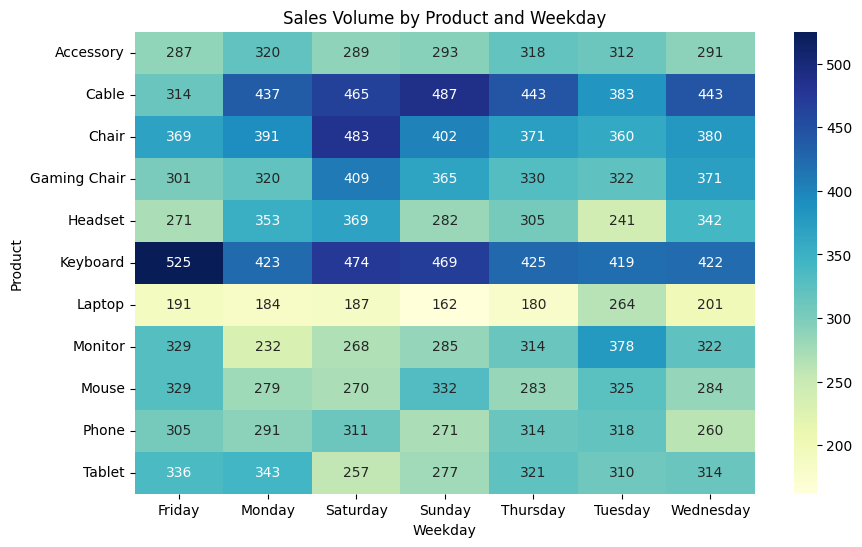

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = products.pivot(index="product", columns="weekday_name", values="units_sold").fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")

plt.title("Sales Volume by Product and Weekday")
plt.ylabel("Product")
plt.xlabel("Weekday")
plt.show()


Q15: Compare weekday sales trends for Jordan vs. Lebanon.

Which weekdays are most profitable in each country?

In [54]:
sales_by_country = (df1.groupby(['country_code','weekday_name'], as_index=False)['total_amount'].sum())
idx = sales_by_country.groupby('country_code')['total_amount'].idxmax()
top_day_per_country = sales_by_country.loc[idx]
top_day_per_country

,country_code,weekday_name,total_amount
5,Jordan,Tuesday,445284.209640
12,Lebanon,Tuesday,440489.847199


Q16: Find the top-performing salesperson per year (2022, 2023, 2024)

based on total sales amount Show their total sales amount for each year

In [55]:
choosen_years = df1[df1["year"].isin([2022,2023,2024])]
top_salesman = choosen_years.groupby(["year","sales_person"])["total_amount"].sum().reset_index()
top_salesman.loc[top_salesman.groupby("year")["total_amount"].idxmax()]

,year,sales_person,total_amount
2,2022,lina,246710.302306
10,2023,sami,274164.966621
12,2024,ahmed,255498.591750


Q17: Which salesperson generated the highest commission over the period? Who generated the least?

In [56]:
df1.groupby("sales_person")["total_amount"].sum().idxmax()

'sami'

In [57]:
df1.groupby("sales_person")["total_amount"].sum().idxmin()


'sara'

Q18: Calculate the Year-over-Year (YoY) percentage change in sales for each country.

Visualize the sales trends for all countries over the years.

Based on your results, describe how each country is performing.

Identify which country shows consistent growth, which is stable, and if any country shows declining trends.

In [58]:
# Calculate annual sales per country
df1['year'] = df1['year'].astype(int)
annual_sales_country = df1.groupby(['year', 'country_code'])['total_amount'].sum().unstack()

# Calculate Year-over-Year percentage change
yoy_change = annual_sales_country.pct_change(axis=0) * 100

# Display the result
display(yoy_change)

country_code,Jordan,Lebanon
year,,
2021,NaN,NaN
2022,-2.159302,7.941006
2023,4.270231,4.488105
2024,10.670828,-11.154818
2025,-49.678248,-41.739480


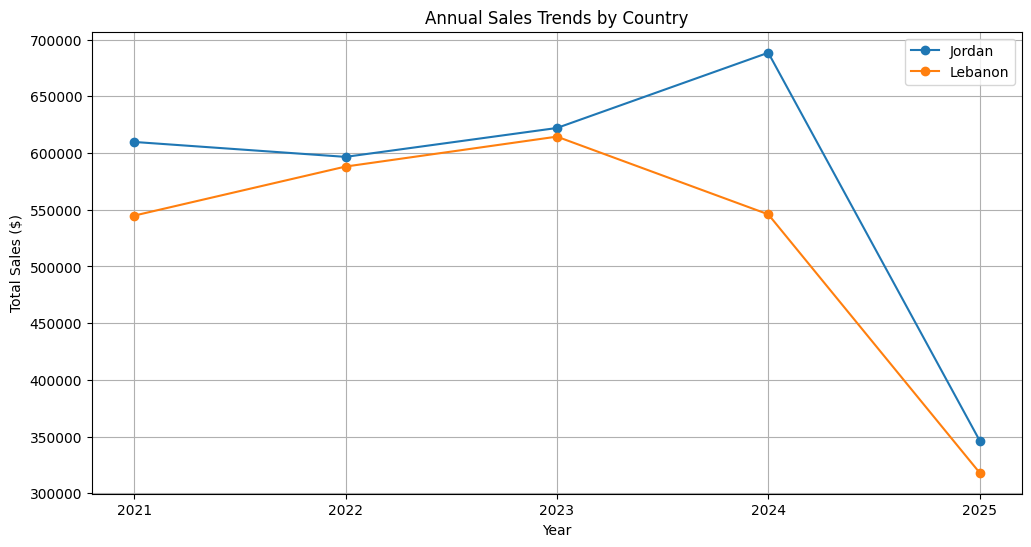

In [59]:
plt.figure(figsize=(12, 6))
for country in annual_sales_country.columns:
    plt.plot(annual_sales_country.index, annual_sales_country[country], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Total Sales ($)')
plt.title('Annual Sales Trends by Country')
plt.xticks(annual_sales_country.index)  # This forces only your actual years to show
plt.legend()
plt.grid(True)
plt.show()

Q19: Create a monthly summary report for each product



*   showing total sales revenue, number of transactions, and total units sold.

*   Show the trend of total sales for a specific product over the months of 2024





In [60]:
months = merged_df.groupby(["month","product"])[["total_amount","units_sold"]].sum()
transactions = merged_df.groupby(["month","product"])["order_id"].size()

new = pd.concat([months,transactions],axis=1)
new.columns = ["total_amount","units_sold","transactions"]

new = new.reset_index()
new["month_name"] = pd.to_datetime(new["month"], format="%m").dt.strftime("%B")

new = new.drop(columns=["month"])
new = new[["month_name", "product", "total_amount", "units_sold", "transactions"]]
new

,month_name,product,total_amount,units_sold,transactions
0,January,Accessory,5268.858000,176,67
1,January,Cable,2070.709946,265,75
2,January,Chair,29873.168320,251,96
3,January,Gaming Chair,43048.529400,197,77
4,January,Headset,13584.857400,194,69
...,...,...,...,...,...
127,December,Laptop,110371.080026,91,46
128,December,Monitor,39214.879900,155,59
129,December,Mouse,4673.522200,188,71
130,December,Phone,91529.027800,152,53


Q20: How many promotion periods were there?

For each period, specify the month and year, and list the products included in the promotion?

In [61]:
df1.loc[df1["promotion_flag"]==1,["year","month","product"]].sort_values(["year","month"]).groupby(["year","month"])["product"].unique().reset_index()

,year,month,product
0,2023,7,"[Laptop, Mouse, Keyboard, Chair]"
1,2024,11,"[Headset, Gaming Chair]"
2,2024,12,"[Gaming Chair, Headset]"


In [62]:
print(f"number of periods: {df1.loc[df1["promotion_flag"]==1,["year","month","product"]].sort_values(["year","month"]).groupby(["year","month"])["product"].unique().reset_index().shape[0]}")

number of periods: 3


# External Charts

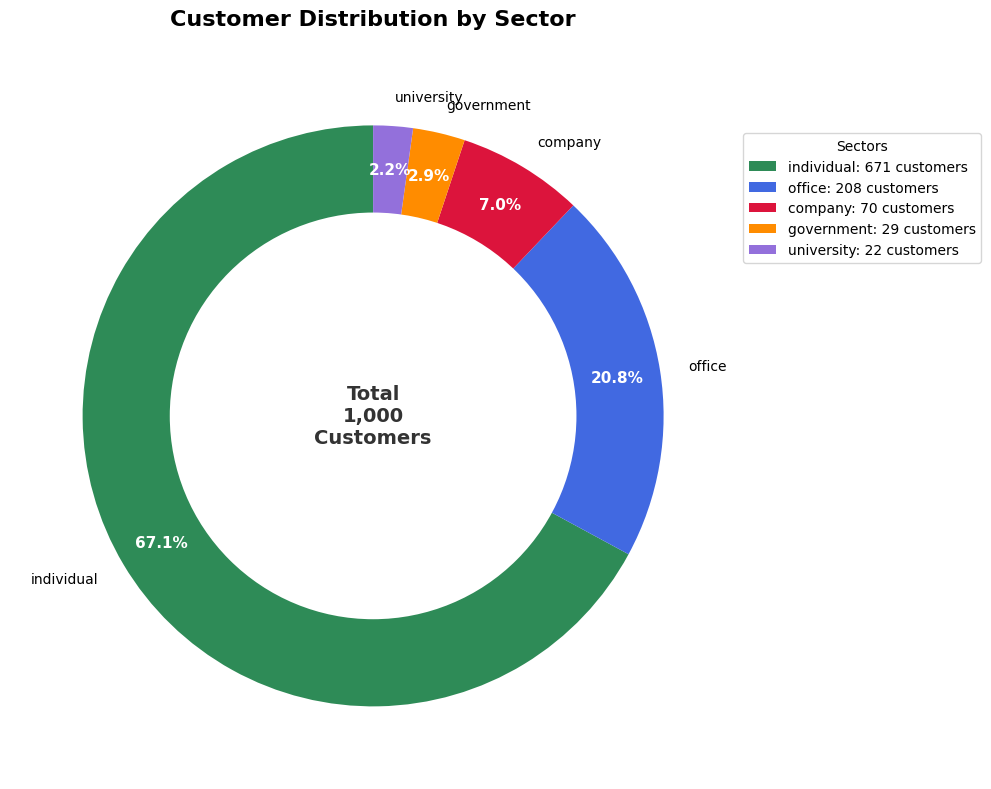

In [63]:
import matplotlib.pyplot as plt
import pandas as pd

customers_by_sector = merged_df.groupby('sector')['customer_id'].nunique().sort_values(ascending=False)



fig, ax = plt.subplots(figsize=(10, 8))

colors = ['#2E8B57', '#4169E1', '#DC143C', '#FF8C00', '#9370DB', '#20B2AA']

wedges, texts, autotexts = ax.pie(customers_by_sector.values,
                                  labels=customers_by_sector.index,
                                  autopct='%1.1f%%',
                                  colors=colors[:len(customers_by_sector)],
                                  startangle=90,
                                  pctdistance=0.85
                                 )

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(centre_circle)

plt.title('Customer Distribution by Sector', fontsize=16, fontweight='bold', pad=20)

total_customers = customers_by_sector.sum()
ax.text(0, 0, f'Total\n{total_customers:,}\nCustomers',
        horizontalalignment='center', verticalalignment='center',
        fontsize=14, fontweight='bold', color='#333333')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)


legend_labels = [f'{sector}: {count} customers' for sector, count in customers_by_sector.items()]
ax.legend(wedges, legend_labels, title="Sectors", loc="center left", bbox_to_anchor=(1,0.3,0.5,1))

plt.tight_layout()
plt.show()

In [64]:
sector_purchases = merged_df.groupby("sector")["total_amount"].sum().reset_index().sort_values("total_amount", ascending=False)

fig = px.bar(
    sector_purchases,
    x="sector",
    y="total_amount",
    title="Purchases by Sector",
    labels={"total_amount": "Total Purchases (USD)", "sector": "Sector"},
    text_auto=True
)

# Set the default renderer to 'colab' to display the figure in the notebook
fig.show(renderer="colab")

In [65]:
import plotly.graph_objects as go
import pandas as pd

all_years_df = df1[df1["year"].isin([2021, 2022, 2023, 2024, 2025])]

# 2. Determine the consistent order and color mapping for the top 10 salespeople
# Calculate total sales for each person across ALL years to get a master ranking
total_sales_overall = all_years_df.groupby("sales_person")["total_amount"].sum().reset_index()
top_10_overall = total_sales_overall.sort_values("total_amount", ascending=False).head(10)

# This list of names becomes our constant x-axis, ordered by total performance
ordered_salespeople = top_10_overall['sales_person'].tolist()

# Create a consistent color map for these top 10 salespeople
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
color_map = {person: colors[i] for i, person in enumerate(ordered_salespeople)}

# 3. Get the aggregated sales data for each person in each year
yearly_sales = all_years_df.groupby(["year", "sales_person"])["total_amount"].sum().reset_index()

# Create interactive Plotly chart
fig = go.Figure()

years = sorted(yearly_sales['year'].unique())

# Add a trace for each year
for i, year in enumerate(years):
    # Filter data for the current year
    year_data = yearly_sales[yearly_sales['year'] == year]

    # Create a dictionary for quick lookup of sales for the current year
    sales_dict = dict(zip(year_data['sales_person'], year_data['total_amount']))

    # Map sales to our consistently ordered list. If a top salesperson has no
    # sales in a given year, their total will be 0.
    y_values = [sales_dict.get(person, 0) for person in ordered_salespeople]

    # Assign colors from the consistent color map
    bar_colors = [color_map[person] for person in ordered_salespeople]

    fig.add_trace(go.Bar(
        x=ordered_salespeople,  # X-axis is now constant
        y=y_values,
        name=str(year),
        visible=(i == 0),
        marker_color=bar_colors, # Colors are now constant for each person
        text=[f'${val:,.0f}' for val in y_values],
        texttemplate='%{text}',
        textposition='outside',
        hovertemplate='<b>%{x}</b><br>Sales: $%{y:,.2f}<extra></extra>'
    ))

# Create dropdown buttons
buttons = []
for i, year in enumerate(years):
    visibility = [False] * len(years)
    visibility[i] = True
    buttons.append(dict(
        label=str(year),
        method="update",
        args=[{"visible": visibility},
              {"title": f'Sales Person Performance For Year {year}'}] # Update title as well
    ))

# Update layout with dropdown and a fixed y-axis range for better comparison
y_axis_max = yearly_sales['total_amount'].max() * 1.15 # Add 15% padding for text

fig.update_layout(
    title={
        'text': f'Sales Person Performance For Year {years[0]}',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20}
    },
    xaxis_title="Sales Person",
    yaxis_title="Total Sales ($)",
    yaxis_range=[0, y_axis_max],
    height=600,
    width=1200,
    showlegend=False,
    updatemenus=[{
        'buttons': buttons,
        'direction': "down",
        'showactive': True,
        'x': 0.01,
        'xanchor': "left",
        'y': 1.15,
        'yanchor': "top",
    }]
)

fig.update_xaxes(tickangle=-45, tickmode='linear')
fig.update_yaxes(tickformat='$,.0f')

fig.show(renderer="colab")